In [34]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
log_reg.score(x_test, y_test)

0.9755555555555555

In [6]:
y_log_predict = log_reg.predict(x_test)

In [7]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [8]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

FP(y_test, y_log_predict)

2

In [9]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [10]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [11]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)    
    try:
        return tp / (tp + fp)
    except:
        return 0.0

precision_score(y_test, y_log_predict)

0.9473684210526315

In [12]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)    
    try:
        return tp / (tp + fn)
    except:
        return 0.0

recall_score(y_test, y_log_predict)

0.8

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [15]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

In [16]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8674698795180723

In [18]:
log_reg.decision_function(x_test)[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

In [19]:
log_reg.predict(x_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
decision_scores = log_reg.decision_function(x_test)

In [22]:
np.min(decision_scores)

-85.68608522646575

In [23]:
np.max(decision_scores)

19.889585879902206

In [24]:
y_predict2 = np.array(decision_scores >= 5, dtype='int')

In [25]:
confusion_matrix(y_test, y_predict2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [26]:
precision_score(y_test, y_predict2)

0.96

In [27]:
recall_score(y_test, y_predict2)

0.5333333333333333

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [30]:
precisions.shape

(145,)

In [31]:
recalls.shape

(145,)

In [32]:
thresholds.shape

(144,)

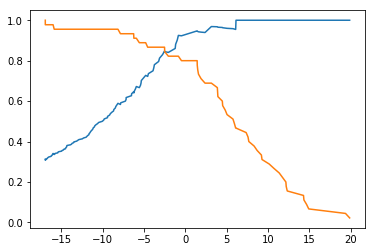

In [36]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

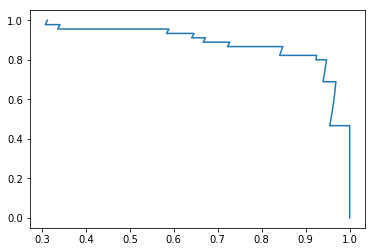

In [37]:
plt.plot(precisions, recalls)
plt.show()

In [38]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

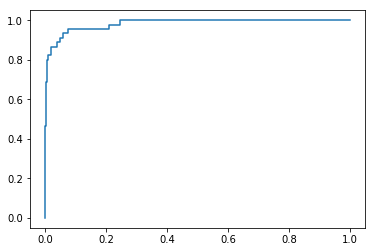

In [39]:
plt.plot(fprs, tprs)
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

In [49]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [51]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
log_reg.score(x_test, y_test)

0.9555555555555556

In [53]:
y_predict = log_reg.predict(x_test)

In [54]:
precision_score(y_test, y_predict, average='micro')

0.9555555555555556

In [57]:
cfm = confusion_matrix(y_test, y_predict)
cfm

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 49,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0,  0, 41]], dtype=int64)

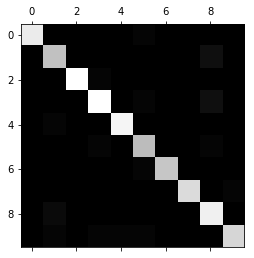

In [58]:
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [59]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.025     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

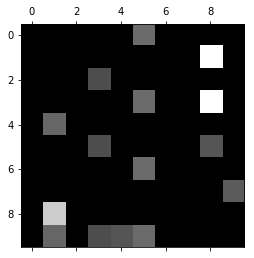

In [60]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()